**SPLIT DATASET INTO TRAINING & VALIDATION**

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
base_dir = '/content/drive/MyDrive/DATASET_BUAH_KOPI'
!ls "/content/drive/MyDrive/DATASET_BUAH_KOPI"

Dataset  Testing  Training  Validation


In [31]:
#Menentukan Direktori
import os

dataset_dir = os.path.join(base_dir, 'Dataset') #nama folder di Gdrive
training_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Validation') 

In [32]:
#melihat banyak dataset yang ada

matang_dir = os.path.join(dataset_dir, 'Matang/') #nama subfolder dari dataset
mentah_dir = os.path.join(dataset_dir, 'Mentah/')
setmatang_dir = os.path.join(dataset_dir, 'SetengahMatang/')

print("Jumlah Data Tiap Label")
print('Jumlah Data Buah Kopi Matang :', len(os.listdir(matang_dir)))
print('Jumlah Data Buah Kopi Mentah :', len(os.listdir(mentah_dir)))
print('Jumlah Data Buah Kopi Setengah Matang :', len(os.listdir(setmatang_dir)))

Jumlah Data Tiap Label
Jumlah Data Buah Kopi Matang : 350
Jumlah Data Buah Kopi Mentah : 350
Jumlah Data Buah Kopi Setengah Matang : 350


**80% TRAINING - 20% VALIDATION**

In [33]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
    files = os.listdir(source)
    num_files = len(files)
    num_train = int(num_files * train_ratio)
    
    train_files = random.sample(files, num_train)
    for file in train_files:
        copyfile(os.path.join(source, file), os.path.join(train, file))

    val_files = list(set(files) - set(train_files))
    for file in val_files:
        copyfile(os.path.join(source, file), os.path.join(val, file))

#Buah Kopi Matang
source = '/content/drive/MyDrive/DATASET_BUAH_KOPI/Dataset/Matang'
train = '/content/drive/MyDrive/DATASET_BUAH_KOPI/Training/Matang'
val = '/content/drive/MyDrive/DATASET_BUAH_KOPI/Validation/Matang'
train_ratio = 0.8
train_val_split(source, train, val, train_ratio)
#Buah Kopi Mentah
source = '/content/drive/MyDrive/DATASET_BUAH_KOPI/Dataset/Mentah'
train = '/content/drive/MyDrive/DATASET_BUAH_KOPI/Training/Mentah'
val = '/content/drive/MyDrive/DATASET_BUAH_KOPI/Validation/Mentah'
train_ratio = 0.8
train_val_split(source, train, val, train_ratio)
#Buah Kopi Setengah Matang
source = '/content/drive/MyDrive/DATASET_BUAH_KOPI/Dataset/SetengahMatang'
train = '/content/drive/MyDrive/DATASET_BUAH_KOPI/Training/SetengahMatang'
val = '/content/drive/MyDrive/DATASET_BUAH_KOPI/Validation/SetengahMatang'
train_ratio = 0.8
train_val_split(source, train, val, train_ratio)

**VISUALISASI DATASET**

In [34]:
dataset='/content/drive/MyDrive/DATASET_BUAH_KOPI'

train_folder = os.path.join(dataset,'Training')
validation_folder = os.path.join(dataset,'Validation')

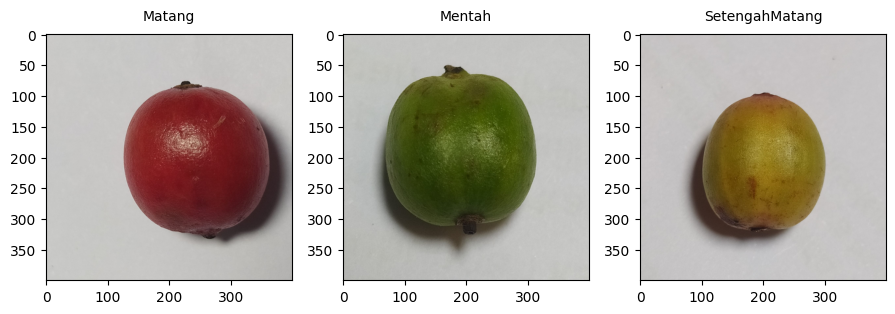

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os, random, pathlib

images = []

for label_folder in sorted(os.listdir(train_folder)):
    label_items = os.listdir(train_folder + '/' + label_folder)
    label_selected = np.random.choice(label_items)
    images.append(os.path.join(train_folder, label_folder, label_selected))

fig=plt.figure(1, figsize=(15, 10))

for subplot, image_ in enumerate(images):
  category=image_.split('/')[-2]
  imgs = plt.imread(image_)
  a,b,c=imgs.shape
  fig=plt.subplot(3, 5, subplot+1)
  fig.set_title(category, pad = 10, size=10)
  plt.imshow(imgs)

plt.tight_layout()